### IMPORT LIBRARIES

In [58]:
# Data Manipulation:
import numpy as np
import pandas as pd

# Data Visualisation:
import matplotlib.pyplot as plt

# Dataset:
from tensorflow.keras.datasets import mnist

# Model:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [59]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

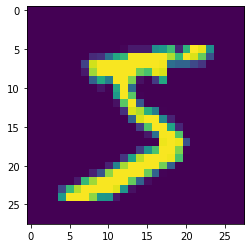

In [60]:
plt.imshow(X_train[0])

In [61]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### CHOOSE A RANFDOM NUMBER

In [62]:
only_zeros = X_train[y_train==0]

In [63]:
only_zeros.shape

(5923, 28, 28)

### Discriminator

In [64]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation='relu'))
# FINAL OUTPUT LAYER
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

### GENERATOR

In [65]:
coding_size = 100

generator = Sequential()

generator.add(Dense(100, activation = 'relu', input_shape=[coding_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

### GAN

In [66]:
gan = Sequential([generator, discriminator])

In [67]:
discriminator.trainable = False

In [68]:
gan.compile(loss='binary_crossentropy', optimizer = 'adam')

### MODEL

In [69]:
batch_size = 32

In [70]:
my_dataset = only_zeros

In [71]:
dataset = tf.data.Dataset.from_tensor_slices(my_dataset).shuffle(buffer_size=1000)

In [72]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [73]:
dataset=dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [74]:
epochs = 1

In [75]:
gan.layers[0].layers
gan.layers[0].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [76]:
gan.layers[1].layers
gan.layers[1].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [77]:
# Grab the seprate components
genarator, discriminator = gan.layers

In [79]:
for epoch in range(epochs):
    print(f"Currently on Epoch{epoch+1}")
    i = 0

for X_batch in dataset:
    i = i+1
    
    if i%100==0:
        print(f"\t Currently on Batch number {i} of {len(my_dataset)//batch_size}")
    
    #DISCRIMINATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size, coding_size])
    
    gen_images = generator(noise)
    
    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch, tf.float32)],axis=0)
    
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
    
    discriminator.trainable=True
    
    discriminator.train_on_batch(X_fake_vs_real, y1)
    
    
    #TRAIN GENERATOR
    noise = tf.random.normal(shape=[batch_size, coding_size])
    
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable=False
    
    gan.train_on_batch(noise,y2)
    
    
print("TRAINING COMPLETE")

Currently on Epoch1
	 Currently on Batch number 100 of 185
TRAINING COMPLETE


In [80]:
noise = tf.random.normal(shape=[10, coding_size])

In [81]:
noise.shape

TensorShape([10, 100])

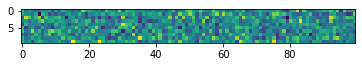

In [82]:
plt.imshow(noise)

In [83]:
images = generator(noise)

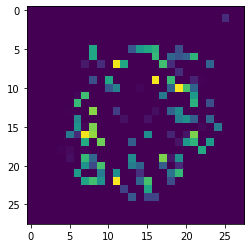

In [88]:
plt.imshow(images[0])

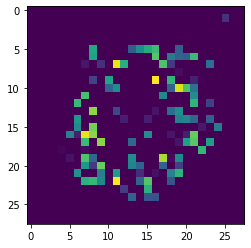

In [87]:
plt.imshow(images[1])